In [1]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00


In [2]:
import pandas as pd

# Load each of the datasets
graph_edges_df = pd.read_csv('graph_edges.csv')
transaction_notes_df = pd.read_csv('transaction_notes.csv')
transactions_df = pd.read_csv('transactions.csv')
accounts_df = pd.read_csv('accounts.csv')
customers_df = pd.read_csv('customers.csv')

# Display basic information and the first few rows of each dataset
graph_edges_info = (graph_edges_df.info(), graph_edges_df.head())
transaction_notes_info = (transaction_notes_df.info(), transaction_notes_df.head())
transactions_info = (transactions_df.info(), transactions_df.head())
accounts_info = (accounts_df.info(), accounts_df.head())
customers_info = (customers_df.info(), customers_df.head())

graph_edges_info, transaction_notes_info, transactions_info, accounts_info, customers_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  1000 non-null   object
 1   target  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1000 non-null   object
 1   note            1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    1000 non-null   object 
 1   from_account      1000 non-null   object 
 2   to_account        1000 non-null   object 
 3   amount            1000 non-null   float64
 

((None,
      source   target
  0   ACC_52  ACC_109
  1  ACC_141    ACC_8
  2  ACC_174  ACC_189
  3   ACC_11  ACC_166
  4  ACC_106   ACC_85),
 (None,
    transaction_id                                               note
  0          TXN_1   According focus arm pay really difference allow.
  1          TXN_2         Human fact affect race expert the because.
  2          TXN_3           So yourself staff expert first whatever.
  3          TXN_4  In reveal trouble form majority already partic...
  4          TXN_5             Fall picture performance economy fast.),
 (None,
    transaction_id from_account to_account   amount            timestamp  \
  0          TXN_1       ACC_52    ACC_109   968.94  2024-10-25 20:46:02   
  1          TXN_2      ACC_141      ACC_8  3809.04  2024-05-08 08:21:10   
  2          TXN_3      ACC_174    ACC_189  4905.90  2024-09-28 00:11:01   
  3          TXN_4       ACC_11    ACC_166   762.07  2024-04-21 17:36:46   
  4          TXN_5      ACC_106     ACC_

In [3]:
# Merging datasets to get a unified view

# Merge transactions with transaction notes based on transaction_id
transactions_full_df = transactions_df.merge(transaction_notes_df, on="transaction_id", how="left")

# Merge accounts with customers to associate each account with customer information
accounts_full_df = accounts_df.merge(customers_df, on="customer_id", how="left")

# Display the first few rows of the merged dataframes
transactions_full_df.head(), accounts_full_df.head()


(  transaction_id from_account to_account   amount            timestamp  \
 0          TXN_1       ACC_52    ACC_109   968.94  2024-10-25 20:46:02   
 1          TXN_2      ACC_141      ACC_8  3809.04  2024-05-08 08:21:10   
 2          TXN_3      ACC_174    ACC_189  4905.90  2024-09-28 00:11:01   
 3          TXN_4       ACC_11    ACC_166   762.07  2024-04-21 17:36:46   
 4          TXN_5      ACC_106     ACC_85   819.64  2024-05-02 08:01:18   
 
   transaction_type                                               note  
 0       Withdrawal   According focus arm pay really difference allow.  
 1         Transfer         Human fact affect race expert the because.  
 2          Payment           So yourself staff expert first whatever.  
 3       Withdrawal  In reveal trouble form majority already partic...  
 4          Deposit             Fall picture performance economy fast.  ,
   account_id customer_id account_type   balance  tenure  age  income  \
 0      ACC_1     CUST_57      Savin

In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Initialize encoders and scalers
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

# Encoding categorical features
transactions_full_df['transaction_type_encoded'] = label_encoder.fit_transform(transactions_full_df['transaction_type'])
accounts_full_df['account_type_encoded'] = label_encoder.fit_transform(accounts_full_df['account_type'])
accounts_full_df['location_encoded'] = label_encoder.fit_transform(accounts_full_df['location'])

# Scaling numerical features in transactions and accounts data
transactions_full_df['amount_scaled'] = scaler.fit_transform(transactions_full_df[['amount']])
accounts_full_df[['balance_scaled', 'age_scaled', 'income_scaled']] = scaler.fit_transform(
    accounts_full_df[['balance', 'age', 'income']]
)

# Display the first few rows of the preprocessed dataframes
transactions_full_df.head(), accounts_full_df.head()


(  transaction_id from_account to_account   amount            timestamp  \
 0          TXN_1       ACC_52    ACC_109   968.94  2024-10-25 20:46:02   
 1          TXN_2      ACC_141      ACC_8  3809.04  2024-05-08 08:21:10   
 2          TXN_3      ACC_174    ACC_189  4905.90  2024-09-28 00:11:01   
 3          TXN_4       ACC_11    ACC_166   762.07  2024-04-21 17:36:46   
 4          TXN_5      ACC_106     ACC_85   819.64  2024-05-02 08:01:18   
 
   transaction_type                                               note  \
 0       Withdrawal   According focus arm pay really difference allow.   
 1         Transfer         Human fact affect race expert the because.   
 2          Payment           So yourself staff expert first whatever.   
 3       Withdrawal  In reveal trouble form majority already partic...   
 4          Deposit             Fall picture performance economy fast.   
 
    transaction_type_encoded  amount_scaled  
 0                         3       0.192174  
 1        

In [5]:
import torch
from torch_geometric.data import Data

# Step 1: Create a mapping from account_id to a unique node index
account_id_to_index = {account_id: idx for idx, account_id in enumerate(accounts_full_df['account_id'])}

# Step 2: Prepare node features
node_features = accounts_full_df[['balance_scaled', 'age_scaled', 'income_scaled',
                                  'account_type_encoded', 'location_encoded']].values
node_features_tensor = torch.tensor(node_features, dtype=torch.float)

# Step 3: Prepare edge indices and edge features
# Map account IDs to node indices for the edges
edge_index = [
    [account_id_to_index[row['from_account']], account_id_to_index[row['to_account']]]
    for _, row in transactions_full_df.iterrows()
]
edge_index_tensor = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Prepare edge features
edge_features = transactions_full_df[['amount_scaled', 'transaction_type_encoded']].values
edge_features_tensor = torch.tensor(edge_features, dtype=torch.float)

# Step 4: Create the PyTorch Geometric Data object
data = Data(x=node_features_tensor, edge_index=edge_index_tensor, edge_attr=edge_features_tensor)

data


Data(x=[200, 5], edge_index=[2, 1000], edge_attr=[1000, 2])

In [7]:
import pandas as pd
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load Data
graph_edges_df = pd.read_csv('graph_edges.csv')
transaction_notes_df = pd.read_csv('transaction_notes.csv')
transactions_df = pd.read_csv('transactions.csv')
accounts_df = pd.read_csv('accounts.csv')
customers_df = pd.read_csv('customers.csv')

# Step 1: Merge and Preprocess Data
transactions_full_df = transactions_df.merge(transaction_notes_df, on="transaction_id", how="left")
accounts_full_df = accounts_df.merge(customers_df, on="customer_id", how="left")

# Initialize encoders and scalers
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

# Encoding categorical features
transactions_full_df['transaction_type_encoded'] = label_encoder.fit_transform(transactions_full_df['transaction_type'])
accounts_full_df['account_type_encoded'] = label_encoder.fit_transform(accounts_full_df['account_type'])
accounts_full_df['location_encoded'] = label_encoder.fit_transform(accounts_full_df['location'])

# Scaling numerical features
transactions_full_df['amount_scaled'] = scaler.fit_transform(transactions_full_df[['amount']])
accounts_full_df[['balance_scaled', 'age_scaled', 'income_scaled']] = scaler.fit_transform(
    accounts_full_df[['balance', 'age', 'income']]
)

# Step 2: Map account IDs to unique indices for node identification
account_id_to_index = {account_id: idx for idx, account_id in enumerate(accounts_full_df['account_id'])}

# Step 3: Create Node Features
node_features = accounts_full_df[['balance_scaled', 'age_scaled', 'income_scaled',
                                  'account_type_encoded', 'location_encoded']].values
node_features_tensor = torch.tensor(node_features, dtype=torch.float)

# Step 4: Define Edges and Edge Features
edge_index = [
    [account_id_to_index[row['from_account']], account_id_to_index[row['to_account']]]
    for _, row in transactions_full_df.iterrows()
]
edge_index_tensor = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Prepare edge features
edge_features = transactions_full_df[['amount_scaled', 'transaction_type_encoded']].values
edge_features_tensor = torch.tensor(edge_features, dtype=torch.float)

# Step 5: Create the PyTorch Geometric Data object
data = Data(x=node_features_tensor, edge_index=edge_index_tensor, edge_attr=edge_features_tensor)

# Display summary of data for verification
print(data)


Data(x=[200, 5], edge_index=[2, 1000], edge_attr=[1000, 2])


In [8]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import train_test_split_edges

# Step 1: Add Labels for Node Classification
# Assuming 'account_type_encoded' is the target label for classification
labels = accounts_full_df['account_type_encoded'].values
labels_tensor = torch.tensor(labels, dtype=torch.long)

# Step 2: Train/Val/Test Masks for Node Classification
# Define 80% of nodes for training, 10% for validation, and 10% for testing
num_nodes = len(labels)
num_train = int(0.8 * num_nodes)
num_val = int(0.1 * num_nodes)
num_test = num_nodes - num_train - num_val

# Generate random masks for each set
perm = torch.randperm(num_nodes)
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[perm[:num_train]] = True
val_mask[perm[num_train:num_train + num_val]] = True
test_mask[perm[num_train + num_val:]] = True

# Step 3: Update the Data Object
data.y = labels_tensor
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

# Display the data object to verify
print(data)


Data(x=[200, 5], edge_index=[2, 1000], edge_attr=[1000, 2], y=[200], train_mask=[200], val_mask=[200], test_mask=[200])


In [9]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)  # First convolutional layer
        self.conv2 = GCNConv(16, num_classes)        # Second convolutional layer

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)  # Apply ReLU activation
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)  # Log softmax for classification


In [10]:
def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

@torch.no_grad()
def evaluate(model, data, mask):
    model.eval()
    out = model(data)
    pred = out[mask].max(1)[1]
    accuracy = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
    return accuracy

# Initialize the model, optimizer, and device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(num_node_features=data.num_node_features, num_classes=len(set(data.y.tolist()))).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training loop
num_epochs = 50
for epoch in range(1, num_epochs + 1):
    loss = train(model, optimizer, data)
    train_acc = evaluate(model, data, data.train_mask)
    val_acc = evaluate(model, data, data.val_mask)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')


Epoch: 001, Loss: 21.2992, Train Acc: 0.3625, Val Acc: 0.2000
Epoch: 002, Loss: 19.3391, Train Acc: 0.3625, Val Acc: 0.2000
Epoch: 003, Loss: 17.4047, Train Acc: 0.3625, Val Acc: 0.2000
Epoch: 004, Loss: 15.4973, Train Acc: 0.3625, Val Acc: 0.2000
Epoch: 005, Loss: 13.6115, Train Acc: 0.3625, Val Acc: 0.2000
Epoch: 006, Loss: 11.7417, Train Acc: 0.3625, Val Acc: 0.2000
Epoch: 007, Loss: 9.9097, Train Acc: 0.3625, Val Acc: 0.2000
Epoch: 008, Loss: 8.4106, Train Acc: 0.3625, Val Acc: 0.2500
Epoch: 009, Loss: 8.2354, Train Acc: 0.3625, Val Acc: 0.2500
Epoch: 010, Loss: 8.4335, Train Acc: 0.3625, Val Acc: 0.2500
Epoch: 011, Loss: 8.3698, Train Acc: 0.3625, Val Acc: 0.2500
Epoch: 012, Loss: 8.0570, Train Acc: 0.3625, Val Acc: 0.2500
Epoch: 013, Loss: 7.5495, Train Acc: 0.3625, Val Acc: 0.2500
Epoch: 014, Loss: 6.8927, Train Acc: 0.3625, Val Acc: 0.2500
Epoch: 015, Loss: 6.1236, Train Acc: 0.3625, Val Acc: 0.2500
Epoch: 016, Loss: 5.2778, Train Acc: 0.3625, Val Acc: 0.2500
Epoch: 017, Loss: 

In [11]:
# Evaluate model on test set
test_acc = evaluate(model, data, data.test_mask)
print(f'Test Accuracy: {test_acc:.4f}')


Test Accuracy: 0.5000


In [12]:
@torch.no_grad()
def get_predictions(data, model):
    model.eval()
    out = model(data)
    pred = out.max(1)[1]
    return pred[data.test_mask], data.y[data.test_mask]

# Get predictions and true labels
pred_labels, true_labels = get_predictions(data, model)

# Print a summary of correct and incorrect predictions
correct = pred_labels.eq(true_labels)
print(f'Correct Predictions: {correct.sum().item()} / {correct.size(0)}')


Correct Predictions: 10 / 20


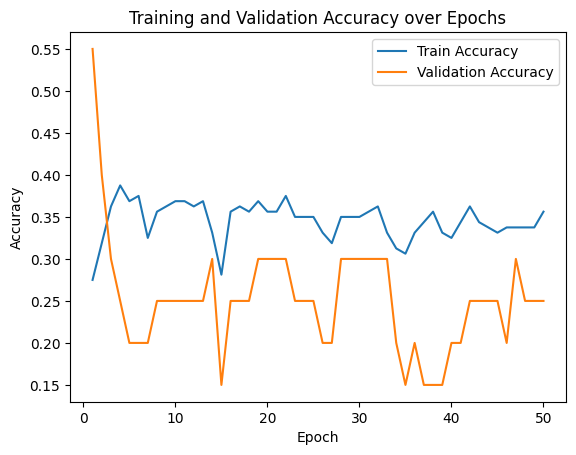

In [13]:
import matplotlib.pyplot as plt

# Assume `train_accs` and `val_accs` store training and validation accuracy per epoch
train_accs, val_accs = [], []
for epoch in range(1, num_epochs + 1):
    loss = train(model, optimizer, data)
    train_acc = evaluate(model, data, data.train_mask)
    val_acc = evaluate(model, data, data.val_mask)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), train_accs, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


In [14]:
@torch.no_grad()
def get_node_embeddings(data, model):
    model.eval()
    x, edge_index = data.x, data.edge_index
    x = model.conv1(x, edge_index)  # Extract embeddings after first layer
    return x

# Get the node embeddings
embeddings = get_node_embeddings(data, model)


In [15]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction to 2D
embeddings_2d = TSNE(n_components=2, random_state=42).fit_transform(embeddings.cpu().numpy())


In [16]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction to 2D
embeddings_2d = TSNE(n_components=2, random_state=42).fit_transform(embeddings.cpu().numpy())


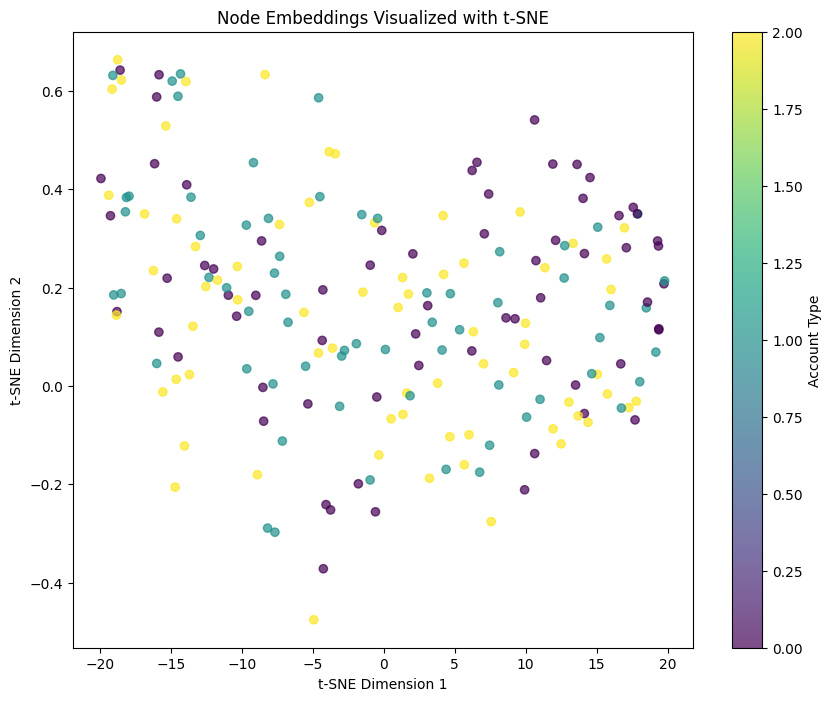

In [17]:
import matplotlib.pyplot as plt

# Plot embeddings with colors representing the true labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=data.y.cpu(), cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Account Type')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Node Embeddings Visualized with t-SNE')
plt.show()
